In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import tensorflow as tf
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, GlobalAveragePooling2D, Flatten, Dense, Dropout, Conv1D, MaxPool1D, BatchNormalization
from keras.utils import to_categorical
!pip install scikit-plot
import scikitplot

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 470 extracted features for 11,598 APK files comprising frequencies of system calls, binders, and composite behaviors
df = pd.read_csv('/content/drive/MyDrive/CyberSec_Project_Data/feature_vectors_syscallsbinders_frequency_5_Cat.csv') # Dynamically observed behaviors
# df = pd.read_csv('/content/drive/MyDrive/Cyber sec project/feature_vectors_syscallsbinders_frequency_5_Cat.csv') # Dynamically observed behaviors

# Data Preprocessing

In [ ]:
df.head()

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1


In [ ]:
df.shape

(11598, 471)

In [ ]:
df.dtypes

ACCESS_PERSONAL_INFO___    int64
ALTER_PHONE_STATE___       int64
ANTI_DEBUG_____            int64
CREATE_FOLDER_____         int64
CREATE_PROCESS`_____       int64
                           ...  
watchRotation              int64
windowGainedFocus          int64
write                      int64
writev                     int64
Class                      int64
Length: 471, dtype: object

In [ ]:
df.describe()

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
count,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.00000,11598.000000,11598.000000,...,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,1.159800e+04,11598.000000
mean,57.435334,0.001207,0.044577,5.781342,0.983877,29.770391,29.641749,2.25125,73.661493,6.688395,...,0.093292,2.232454,0.001811,0.000690,6.453958,0.000690,1.647870,1071.197362,1.039598e+03,3.131919
std,444.149233,0.055703,1.104287,10.380946,4.061886,32.170379,267.652850,9.86903,219.079872,20.050449,...,1.808335,15.691146,0.070084,0.029357,164.278529,0.026256,9.927242,6151.477714,1.712849e+04,1.197716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,10.000000,2.000000,0.00000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,1.200000e+01,2.000000
50%,2.000000,0.000000,0.000000,3.000000,0.000000,17.000000,3.000000,0.00000,20.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,256.000000,4.400000e+01,3.000000
75%,8.000000,0.000000,0.000000,6.000000,0.000000,39.000000,21.000000,0.00000,52.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1142.750000,1.440000e+02,4.000000
max,7647.000000,5.000000,91.000000,700.000000,140.000000,1332.000000,26631.000000,399.00000,8380.000000,1192.000000,...,113.000000,117.000000,6.000000,2.000000,17431.000000,1.000000,1042.000000,490069.000000,1.301356e+06,5.000000


In [ ]:
df.columns

Index(['ACCESS_PERSONAL_INFO___', 'ALTER_PHONE_STATE___', 'ANTI_DEBUG_____',
       'CREATE_FOLDER_____', 'CREATE_PROCESS`_____', 'CREATE_THREAD_____',
       'DEVICE_ACCESS_____', 'EXECUTE_____', 'FS_ACCESS____',
       'FS_ACCESS()____',
       ...
       'utimes', 'vfork', 'vibrate', 'vibratePattern', 'wait4',
       'watchRotation', 'windowGainedFocus', 'write', 'writev', 'Class'],
      dtype='object', length=471)

In [ ]:
# df.columns.tolist()

In [ ]:
len(df.columns)

471

In [ ]:
df['Class'].describe
# Labels
# Adware: 1,253-------1
# Banking: 2,100------2
# SMS malware: 3,904--3
# Riskware: 2,546-----4
# Benign: 1,795-------5

<bound method NDFrame.describe of 0        1
1        1
2        1
3        1
4        1
        ..
11593    5
11594    5
11595    5
11596    5
11597    5
Name: Class, Length: 11598, dtype: int64>

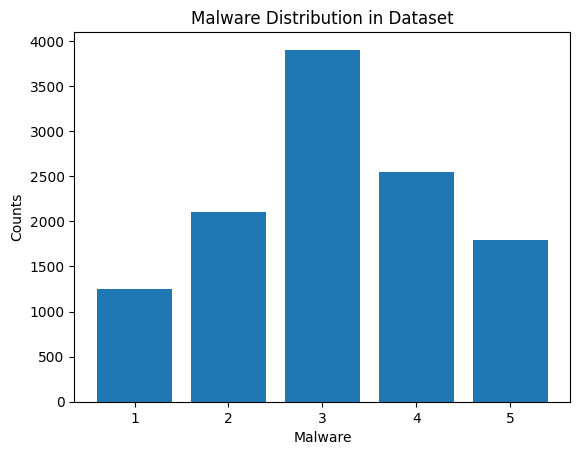

In [ ]:
label_counts = df['Class'].value_counts()

labels = label_counts.index.tolist()
counts = label_counts.tolist()

plt.bar(labels, counts)
plt.xlabel('Malware')
plt.ylabel('Counts')
plt.title('Malware Distribution in Dataset')
plt.show()

In [ ]:
df.isnull().sum()

ACCESS_PERSONAL_INFO___    0
ALTER_PHONE_STATE___       0
ANTI_DEBUG_____            0
CREATE_FOLDER_____         0
CREATE_PROCESS`_____       0
                          ..
watchRotation              0
windowGainedFocus          0
write                      0
writev                     0
Class                      0
Length: 471, dtype: int64

In [ ]:
df[df['Class']==1]

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,15,0,0,6,2,31,25,8,64,46,...,0,0,0,0,4,0,0,133,41,1
1249,10,0,0,4,10,35,14,40,89,9,...,0,0,0,0,16,0,5,2900,164,1
1250,7,0,0,4,0,46,6,0,37,8,...,0,0,0,0,0,0,4,584,45,1
1251,2,0,0,0,0,19,3,0,3,5,...,0,0,0,0,0,0,0,102,19,1


In [ ]:
df['Class'].value_counts()

3    3904
4    2546
2    2100
5    1795
1    1253
Name: Class, dtype: int64

In [ ]:
df['Class'].value_counts() / len(df)
# too many intances for class 3 adn less for class 1

3    0.336610
4    0.219521
2    0.181066
5    0.154768
1    0.108036
Name: Class, dtype: float64

In [ ]:
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)

In [ ]:
# from sklearn.feature_selection import RFE

num_features_to_select = 100
selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Get the indices of selected features
selected_feature_indices = selector.get_support(indices=True)
print(selected_feature_indices)

[  3   4   5   7   8   9  10  12  13  14  18  19  22  23  25  28  31  33
  34  35  36  44  52  53  61  65  68  69  70  72  78  79  84  85  86  88
  89  90  92  95  96  97 100 101 102 104 106 107 113 114 116 119 124 131
 159 160 200 213 233 236 237 238 242 244 252 257 259 267 286 288 290 291
 294 296 298 300 311 312 316 322 336 348 354 357 358 376 377 378 381 387
 415 426 427 428 430 431 437 438 450 453]


In [ ]:
print(X_train.shape, X_test.shape)

(9278, 100) (2320, 100)


In [ ]:
# Classes are imbalanced. Using SMOTE- Oversampling technique that produces new synthetic data samples using a simple algorithm
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 100)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

print("Post OverSampling, the shape of  diver_X: {}".format(X_train.shape))
print("Post OverSampling, the shape of diver_y: {}".format(y_train.shape))

pd.DataFrame(y_train).value_counts() / len(y_train)

Post OverSampling, the shape of  diver_X: (15615, 100)
Post OverSampling, the shape of diver_y: (15615,)


1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# Model 1: Naive Bayes Classifier


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict labels on the test set
y_pred = nb_model.predict(X_test)

In [ ]:
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average='weighted')
nb_recall = recall_score(y_test, y_pred, average='weighted')
nb_f1 = f1_score(y_test, y_pred, average='weighted')

# Create table data
table_data = [
    ["Naive Bayes Classifier Accuracy", f"{nb_accuracy:.4f}"],
    ["Naive Bayes Classifier Precision", f"{nb_precision:.4f}"],
    ["Naive Bayes Classifier Recall", f"{nb_recall:.4f}"],
    ["Naive Bayes Classifier F1-Score", f"{nb_f1:.4f}"]
]

# Print data in tabular format
print(tabulate(table_data, headers=["Metric", "Score"], tablefmt="fancy_grid"))

╒══════════════════════════════════╤═════════╕
│ Metric                           │   Score │
╞══════════════════════════════════╪═════════╡
│ Naive Bayes Classifier Accuracy  │  0.5332 │
├──────────────────────────────────┼─────────┤
│ Naive Bayes Classifier Precision │  0.5734 │
├──────────────────────────────────┼─────────┤
│ Naive Bayes Classifier Recall    │  0.5332 │
├──────────────────────────────────┼─────────┤
│ Naive Bayes Classifier F1-Score  │  0.4925 │
╘══════════════════════════════════╧═════════╛


<Axes: >

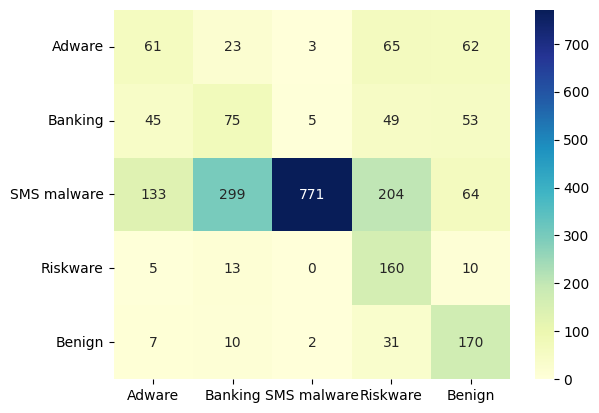

In [ ]:
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)

# Model 2: Random Forest Classifier

In [ ]:
rfModel = RandomForestClassifier(n_estimators=300, random_state=42)
rfModel.fit(X_train, y_train)

# Predict labels on the test set
y_pred = rfModel.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted')
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')

# Create table data
table_data = [
    ["Random Forest Classifier Accuracy", f"{rf_accuracy:.4f}"],
    ["Random Forest Classifier Precision", f"{rf_precision:.4f}"],
    ["Random Forest Classifier Recall", f"{rf_recall:.4f}"],
    ["Random Forest Classifier F1-Score", f"{rf_f1:.4f}"]
]

# Print data in tabular format
print(tabulate(table_data, headers=["Metric", "Score"], tablefmt="fancy_grid"))

╒════════════════════════════════════╤═════════╕
│ Metric                             │   Score │
╞════════════════════════════════════╪═════════╡
│ Random Forest Classifier Accuracy  │  0.9435 │
├────────────────────────────────────┼─────────┤
│ Random Forest Classifier Precision │  0.9451 │
├────────────────────────────────────┼─────────┤
│ Random Forest Classifier Recall    │  0.9435 │
├────────────────────────────────────┼─────────┤
│ Random Forest Classifier F1-Score  │  0.9436 │
╘════════════════════════════════════╧═════════╛


<Axes: >

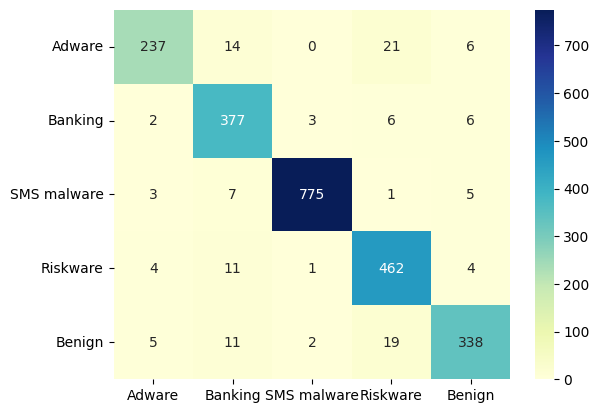

In [ ]:
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)

# Model 3: Logistic Regression





In [ ]:
logmodel = LogisticRegression(max_iter=1000000, random_state=42)
logmodel.fit(X_train_std, y_train)

# Predict labels on the test set
y_pred = logmodel.predict(X_test_std)

In [ ]:
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average='weighted')
lr_recall = recall_score(y_test, y_pred, average='weighted')
lr_f1 = f1_score(y_test, y_pred, average='weighted')

# Create table data
table_data = [
    ["Logistic Regression Accuracy", f"{lr_accuracy:.4f}"],
    ["Logistic Regression Precision", f"{lr_precision:.4f}"],
    ["Logistic Regression Recall", f"{lr_recall:.4f}"],
    ["Logistic Regression F1-Score", f"{lr_f1:.4f}"]
]

# Print data in tabular format
print(tabulate(table_data, headers=["Metric", "Score"], tablefmt="fancy_grid"))

╒═══════════════════════════════╤═════════╕
│ Metric                        │   Score │
╞═══════════════════════════════╪═════════╡
│ Logistic Regression Accuracy  │  0.7276 │
├───────────────────────────────┼─────────┤
│ Logistic Regression Precision │  0.7666 │
├───────────────────────────────┼─────────┤
│ Logistic Regression Recall    │  0.7276 │
├───────────────────────────────┼─────────┤
│ Logistic Regression F1-Score  │  0.7326 │
╘═══════════════════════════════╧═════════╛


<Axes: >

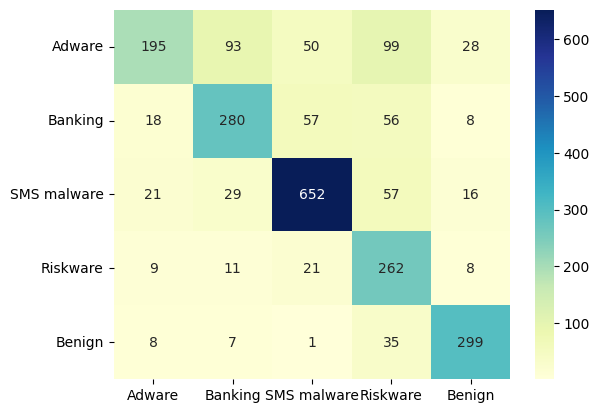

In [ ]:
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)

# Model 4: SVM

In [ ]:
SVmodel = SVC(kernel='linear', C=1.0, random_state=42)
SVmodel.fit(X_train_std, y_train)

# Predict labels on the test set
y_pred = SVmodel.predict(X_test_std)

In [ ]:
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')

# Create table data
table_data = [
    ["SVM Classifier Accuracy", f"{svm_accuracy:.4f}"],
    ["SVM Classifier Precision", f"{svm_precision:.4f}"],
    ["SVM Classifier Recall", f"{svm_recall:.4f}"],
    ["SVM Classifier F1-Score", f"{svm_f1:.4f}"]
]

# Print data in tabular format
print(tabulate(table_data, headers=["Metric", "Score"], tablefmt="fancy_grid"))

╒══════════════════════════╤═════════╕
│ Metric                   │   Score │
╞══════════════════════════╪═════════╡
│ SVM Classifier Accuracy  │  0.7556 │
├──────────────────────────┼─────────┤
│ SVM Classifier Precision │  0.7946 │
├──────────────────────────┼─────────┤
│ SVM Classifier Recall    │  0.7556 │
├──────────────────────────┼─────────┤
│ SVM Classifier F1-Score  │  0.7632 │
╘══════════════════════════╧═════════╛


<Axes: >

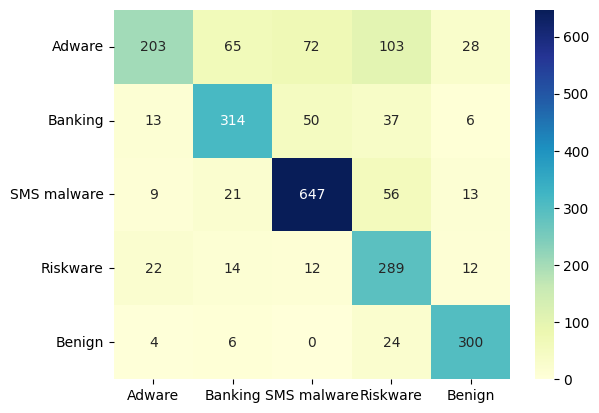

In [ ]:
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)

# Model 5: K-Nearest Neighbors

In [ ]:
k_values = [2, 3, 5, 7, 9, 11]

best_k = None
best_accuracy = 0

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # Use cross-validation to evaluate the model
    scores = cross_val_score(knn_model, X_train_std, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

# Train the KNN model with the best k
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train_std, y_train)

# Predict labels on the test set
y_pred = best_knn_model.predict(X_test_std)

In [ ]:
# Calculate KNN classifier metrics
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')

# Create table data
table_data = [
    ["Best K:", f"{best_k}"],
    ["K-Nearest Neighbors Classifier Accuracy", f"{knn_accuracy:.4f}"],
    ["K-Nearest Neighbors Classifier Precision", f"{knn_precision:.4f}"],
    ["K-Nearest Neighbors Classifier Recall", f"{knn_recall:.4f}"],
    ["K-Nearest Neighbors Classifier F1-Score", f"{knn_f1:.4f}"]
]

# Print data in tabular format
print(tabulate(table_data, headers=["Metric", "Score"], tablefmt="fancy_grid"))

╒══════════════════════════════════════════╤═════════╕
│ Metric                                   │   Score │
╞══════════════════════════════════════════╪═════════╡
│ Best K:                                  │  2      │
├──────────────────────────────────────────┼─────────┤
│ K-Nearest Neighbors Classifier Accuracy  │  0.8315 │
├──────────────────────────────────────────┼─────────┤
│ K-Nearest Neighbors Classifier Precision │  0.8351 │
├──────────────────────────────────────────┼─────────┤
│ K-Nearest Neighbors Classifier Recall    │  0.8315 │
├──────────────────────────────────────────┼─────────┤
│ K-Nearest Neighbors Classifier F1-Score  │  0.83   │
╘══════════════════════════════════════════╧═════════╛


<Axes: >

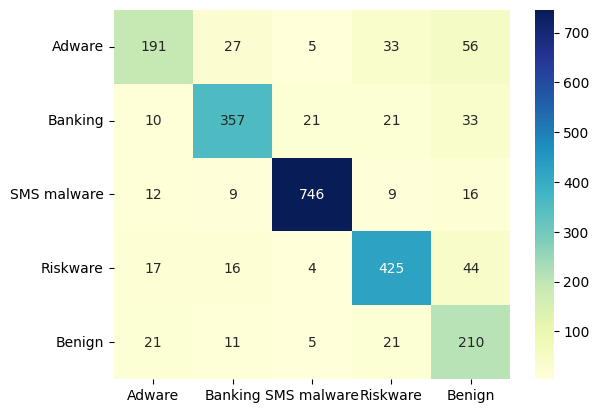

In [ ]:
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)

# Model 6: XG Boost


In [ ]:
# for xgboost == 0.90 can use wihtout label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
xg_y_train = le.fit_transform(y_train)

xg = XGBClassifier()
xg.fit(X_train, xg_y_train)

y_pred = xg.predict(X_test)
y_pred = le.inverse_transform(y_pred)

In [ ]:
# Calculate XGB classifier metrics
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred,average='weighted')
xgb_recall = recall_score(y_test, y_pred,average='weighted')
xgb_f1 = f1_score(y_test, y_pred,average='weighted')

# Create table data
table_data = [
    ["XG Boost Classifier Accuracy", f"{xgb_accuracy:.4f}"],
    ["XG Boost Classifier Precision", f"{xgb_precision:.4f}"],
    ["XG Boost Classifier Recall", f"{xgb_recall:.4f}"],
    ["XG Boost Classifier F1-Score", f"{xgb_f1:.4f}"]
]

# Print data in tabular format
print(tabulate(table_data, headers=["Metric", "Score"], tablefmt="fancy_grid"))

╒═══════════════════════════════╤═════════╕
│ Metric                        │   Score │
╞═══════════════════════════════╪═════════╡
│ XG Boost Classifier Accuracy  │  0.9466 │
├───────────────────────────────┼─────────┤
│ XG Boost Classifier Precision │  0.9471 │
├───────────────────────────────┼─────────┤
│ XG Boost Classifier Recall    │  0.9466 │
├───────────────────────────────┼─────────┤
│ XG Boost Classifier F1-Score  │  0.9466 │
╘═══════════════════════════════╧═════════╛


<Axes: >

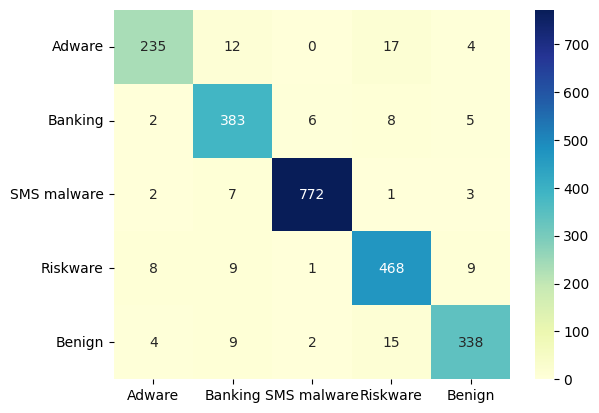

In [ ]:
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)

# Model 7: CNN-LSTM

In [ ]:
# to_categorical functon creates a numpy array for one-hot encoding based on the highest value in the column+1.
# So we need to subtract 1 initially to get 5 classes instead of 6
y_train = y_train - 1
y_test = y_test - 1

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=7, strides=1, padding="same", input_shape=(100, 1), activation='relu'))
model.add(Conv1D(filters=128, kernel_size=5, strides=1, padding="same", activation='relu'))
model.add(Dropout(0.2))
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding="same", activation='relu'))
model.add(MaxPool1D())
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding="same", activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units = 256, return_sequences = False, dropout = 0.2))
model.add(Dense(5, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 100, 128)          1024      
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 128)          82048     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 100, 128)          49280     
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 128)           0         
 D)                                                              
                                                                 
 conv1d_3 (Conv1D)           (None, 50, 128)           49280     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=300, validation_split=0.2, verbose=1)

Epoch 1/300
391/391 [==============================] - 13s 13ms/step - loss: 1.2326 - accuracy: 0.5122 - val_loss: 1.6311 - val_accuracy: 0.3353
Epoch 2/300
391/391 [==============================] - 3s 8ms/step - loss: 1.0091 - accuracy: 0.6267 - val_loss: 1.3793 - val_accuracy: 0.4393
Epoch 3/300
391/391 [==============================] - 3s 8ms/step - loss: 0.8716 - accuracy: 0.6839 - val_loss: 1.2583 - val_accuracy: 0.5344
Epoch 4/300
391/391 [==============================] - 4s 10ms/step - loss: 0.7578 - accuracy: 0.7286 - val_loss: 1.0734 - val_accuracy: 0.6129
Epoch 5/300
391/391 [==============================] - 5s 12ms/step - loss: 0.6853 - accuracy: 0.7640 - val_loss: 1.1022 - val_accuracy: 0.6183
Epoch 6/300
391/391 [==============================] - 4s 9ms/step - loss: 0.6411 - accuracy: 0.7807 - val_loss: 0.8483 - val_accuracy: 0.6846
Epoch 7/300
391/391 [==============================] - 3s 8ms/step - loss: 0.5833 - accuracy: 0.8039 - val_loss: 0.7748 - val_accuracy: 0.

Text(0.5, 0, 'Epochs')

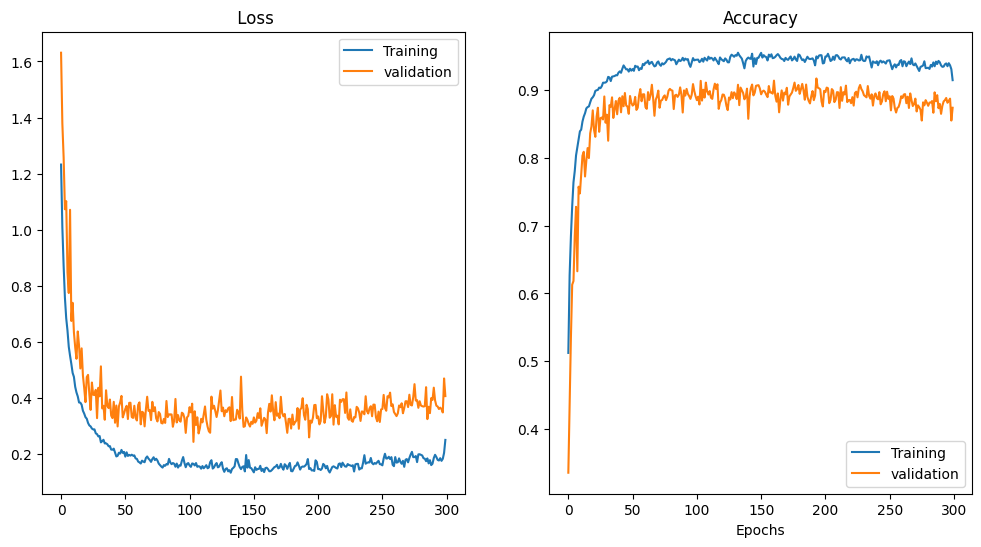

In [ ]:
fig, ax = plt.subplots(1,2, figsize=[12,6])
ax[0].plot(history.history["loss"])
ax[0].plot(history.history["val_loss"])
ax[0].set_title(" Loss")
ax[0].legend(("Training", "validation"), loc="upper right")
ax[0].set_xlabel("Epochs")
ax[1].plot(history.history["accuracy"])
ax[1].plot(history.history["val_accuracy"])
ax[1].legend(("Training", "validation"), loc="lower right")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")

In [ ]:
y_pred = model.predict(X_test)

73/73 [==============================] - 1s 7ms/step


In [ ]:
y_test_categorical = np.argmax(y_test_one_hot, axis=1)
y_pred_categorical = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test_categorical, y_pred_categorical)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       251
           1       0.89      0.87      0.88       420
           2       0.96      0.98      0.97       781
           3       0.92      0.87      0.90       509
           4       0.86      0.81      0.83       359

    accuracy                           0.90      2320
   macro avg       0.88      0.88      0.88      2320
weighted avg       0.90      0.90      0.90      2320



In [ ]:
cnn_accuracy = accuracy_score(y_test_categorical, y_pred_categorical)
cnn_precision = precision_score(y_test_categorical, y_pred_categorical, average='weighted')
cnn_recall = recall_score(y_test_categorical, y_pred_categorical, average='weighted')
cnn_f1 = f1_score(y_test_categorical, y_pred_categorical, average='weighted')

<Axes: >

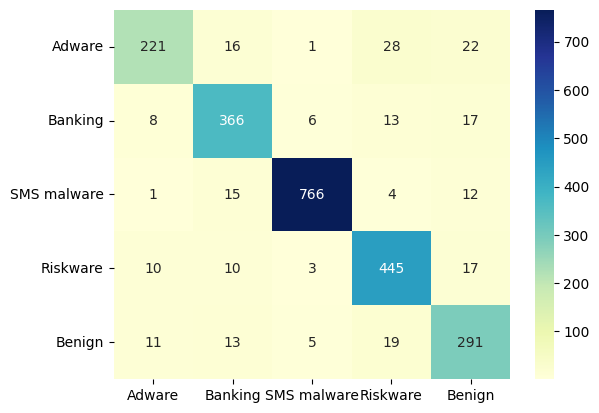

In [ ]:
conf = confusion_matrix(y_pred_categorical, y_test_categorical)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], yticklabels=['Adware' ,'Banking' ,'SMS malware', 'Riskware','Benign'], annot=True)

# Summary

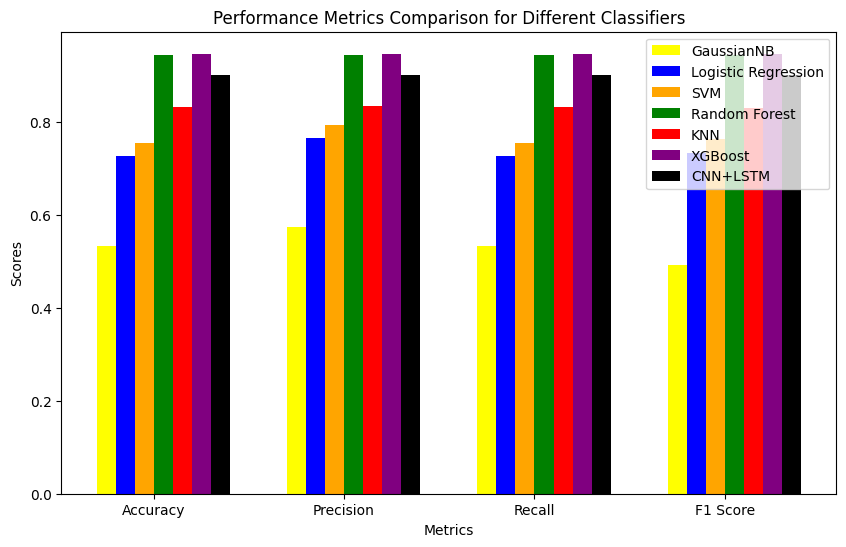

In [ ]:
classifiers = ['GaussianNB','Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'XGBoost', 'CNN+LSTM']
colors = ['yellow', 'blue', 'orange', 'green', 'red', 'purple', 'black']

#metric variables
accuracy_scores = [nb_accuracy, lr_accuracy, svm_accuracy, rf_accuracy, knn_accuracy, xgb_accuracy, cnn_accuracy]
precision_scores = [nb_precision, lr_precision, svm_precision, rf_precision, knn_precision, xgb_precision, cnn_precision]
recall_scores = [nb_recall, lr_recall, svm_recall, rf_recall, knn_recall, xgb_recall, cnn_recall]
f1_scores = [nb_f1, lr_f1, svm_f1, rf_f1, knn_f1, xgb_f1, cnn_f1]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define the data for each metric
data = [accuracy_scores, precision_scores, recall_scores, f1_scores]

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(metrics))

# Set the width of each bar
width = 0.10

#each classifier and plot bars
for i, classifier in enumerate(classifiers):
    ax.bar(x + i*width, [d[i] for d in data], width, label=classifier, color=colors[i])

#labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison for Different Classifiers')
ax.set_xticks(x + 2.5*width)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()

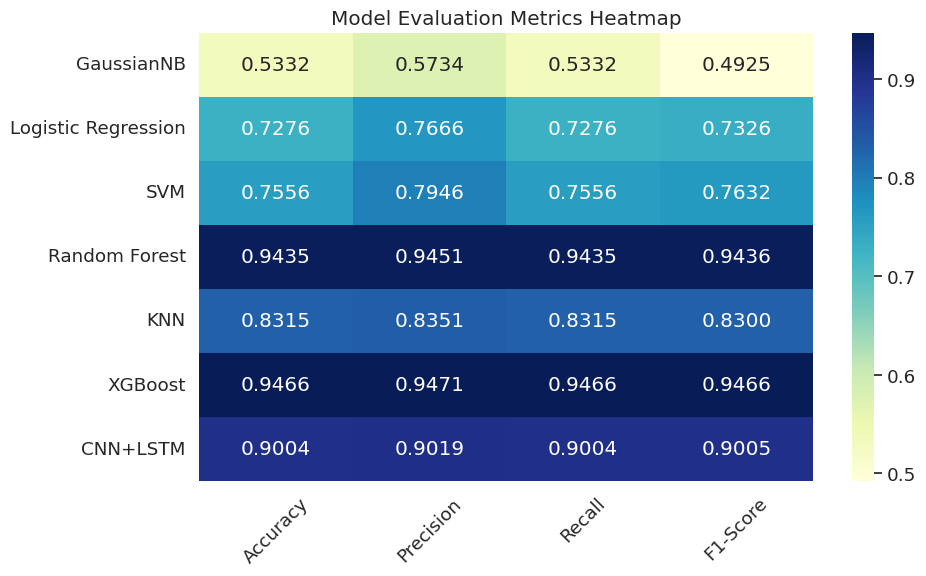

In [ ]:
classifiers = ['GaussianNB','Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'XGBoost', 'CNN+LSTM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# metric scores
accuracy_scores = [nb_accuracy, lr_accuracy, svm_accuracy, rf_accuracy, knn_accuracy, xgb_accuracy, cnn_accuracy]
precision_scores = [nb_precision, lr_precision, svm_precision, rf_precision, knn_precision, xgb_precision, cnn_precision]
recall_scores = [nb_recall, lr_recall, svm_recall, rf_recall, knn_recall, xgb_recall, cnn_recall]
f1_scores = [nb_f1, lr_f1, svm_f1, rf_f1, knn_f1, xgb_f1, cnn_f1]

#dictionary to store metric
metric_scores = {
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}

#DataFrame from the dictionary
metrics = pd.DataFrame(metric_scores, index=classifiers)

#heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(metrics, annot=True, cmap='YlGnBu', fmt='.4f')
plt.title("Model Evaluation Metrics Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()